In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from numpy import asarray
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score



In [12]:
data = pd.read_csv('Final_Covid_Feat.csv')

In [13]:

data



Country  Wave number    Beginning - End  \
0              UK            1   20.Mar - 22. Jun   
1          France            1  15. Mar - 30. Apr   
2          France            2  16. Aug - 12. Dec   
3          France            3  10. Mar - 22. Jun   
4         Belgium            1  18. Mar - 11. May   
..            ...          ...                ...   
66       Michigan            3  23. Feb - 18. Jun   
67  Massachusetts            1  16. Mar - 25. Jun   
68  Massachusetts            2    5. Sep - 2. Mar   
69           Utah            1  28. May - 18. Aug   
70           Utah            2   3. Sep - 31. May   

    Total inf. / total population Highest : Lowest         Speed   \
0                        0.004014        5064 : 646    685.847826   
1                        0.001774       6,887 : 840    943.244444   
2                        0.030864     83,324 : 2100  12360.000000   
3                        0.031265     57,172 : 2044   7905.980392   
4                        0.004512        2454 : 243    605.415094   
..                            ...               ...           ...   
66                       0.035414       10277 : 156   1820.113043   
67                       0.014600        2973 : 149    407.343434   
68                       0.065550        8990 : 586   1512.092486   
69                       0.011699         876 : 207    244.087500   
70                       0.107810        4643 : 140    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    ...  C4_Restrictions on gatherings  C5_Close public transport  \
0   ...                            2.0                        0.5   
1   ...                            4.0                        0.5   
2   ...                            4.0                        0.0   
3   ...                            4.0                        0.0   
4   ...                            2.0                        0.0   
..  ...                            ...                        ...   
66  ...                            3.5                        1.0   
67  ...                            2.0                        0.5   
68  ...                            3.5                        1.0   
69  ...                            3.0                        0.0   
70  ...                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69

In [4]:
#data[data.columns] = StandardScaler().fit_transform(data)
#print(data.describe())

In [15]:
## firstly run the "data" part and than the "xx" part

xx = data.iloc[:,1:21] # 1t for rows and second for columns
xx
#data = data.drop(columns=data.columns[2])
#data = data.drop(columns=data.columns[3])
data
#data

Country  Wave number  Total inf. / total population        Speed   \
0              UK            1                       0.004014    685.847826   
1          France            1                       0.001774    943.244444   
2          France            2                       0.030864  12360.000000   
3          France            3                       0.031265   7905.980392   
4         Belgium            1                       0.004512    605.415094   
..            ...          ...                            ...           ...   
66       Michigan            3                       0.035414   1820.113043   
67  Massachusetts            1                       0.014600    407.343434   
68  Massachusetts            2                       0.065550   1512.092486   
69           Utah            1                       0.011699    244.087500   
70           Utah            2                       0.107810    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    C2_Workplace closing  C3_Cancel public events  \
0                    1.5                      1.0   
1                    1.5                      2.0   
2                    1.5                      1.0   
3                    2.5                      2.0   
4                    1.5                      1.0   
..                   ...                      ...   
66                   2.0                      1.0   
67                   1.5                      1.0   
68                   2.0                      1.5   
69                   1.0                      1.5   
70                   1.5                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                             2.0                        0.5   
1                             4.0                        0.5   
2                             4.0                        0.0   
3                             4.0                        0.0   
4                             2.0                        0.0   
..                            ...                        ...   
66                            3.5                        1.0   
67                            2.0                        0.5   
68                            3.5                        1.0   
69                            3.0                        0.0   
70                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68              

In [16]:
#xx[xx.columns] = StandardScaler().fit_transform(xx)
#print(xx.describe())

In [17]:
xx.corr()

Wave number  \
Wave number                              1.000000   
Total inf. / total population            0.486830   
Speed                                    0.310100   
Height / total population                0.417967   
Length                                   0.409120   
Case Fatality Ratio                     -0.504911   
C1_School closing                        0.126328   
C2_Workplace closing                     0.371832   
C3_Cancel public events                  0.366365   
C4_Restrictions on gatherings            0.565356   
C5_Close public transport                0.241080   
C6_Stay at home requirements             0.397590   
C7_Restrictions on internal movement     0.227443   
C8_International travel controls         0.132001   
H2_Testing policy                        0.629663   
H6_Facial Coverings                      0.649063   
H7_Vaccination policy                    0.664631   
StringencyIndex                          0.455136   
GovernmentResponseIndex                  0.609978   

                                      Total inf. / total population    Speed   \
Wave number                                                0.486830  0.310100   
Total inf. / total population                              1.000000  0.169016   
Speed                                                      0.169016  1.000000   
Height / total population                                  0.175559  0.231536   
Length                                                     0.885123  0.125407   
Case Fatality Ratio                                       -0.357318 -0.180083   
C1_School closing                                          0.316216 -0.044412   
C2_Workplace closing                                       0.225948  0.273716   
C3_Cancel public events                                    0.215689  0.254301   
C4_Restrictions on gatherings                              0.488582  0.287212   
C5_Close public transport                                  0.014795 -0.013454   
C6_Stay at home requirements                               0.072323  0.152444   
C7_Restrictions on internal movement                       0.018588  0.135662   
C8_International travel controls                          -0.103049  0.349008   
H2_Testing policy                                          0.526825  0.252447   
H6_Facial Coverings                                        0.540849  0.491837   
H7_Vaccination policy                                      0.097455  0.198613   
StringencyIndex                                            0.180059  0.321921   
GovernmentResponseIndex                                    0.304609  0.372410   

                                      Height / total population    Length  \
Wave number                                            0.417967  0.409120   
Total inf. / total population                          0.175559  0.885123   
Speed                                                  0.231536  0.125407   
Height / total population                              1.000000  0.125669   
Length                                                 0.125669  1.000000   
Case Fatality Ratio                                   -0.170947 -0.385284   
C1_School closing                                      0.079626  0.375291   
C2_Workplace closing                                   0.006144  0.252737   
C3_Cancel public events                                0.023215  0.285050   
C4_Restrictions on gatherings                          0.093626  0.493618   
C5_Close public transport                             -0.022984  0.104434   
C6_Stay at home requirements                           0.096291  0.173789   
C7_Restrictions on internal movement                   0.242930  0.138864   
C8_International travel controls                      -0.016520 -0.148418   
H2_Testing policy                                      0.300160  0.490296   
H6_Facial Coverings                                    0.387962  0.503300   
H7_Vaccination policy                          

<AxesSubplot:>

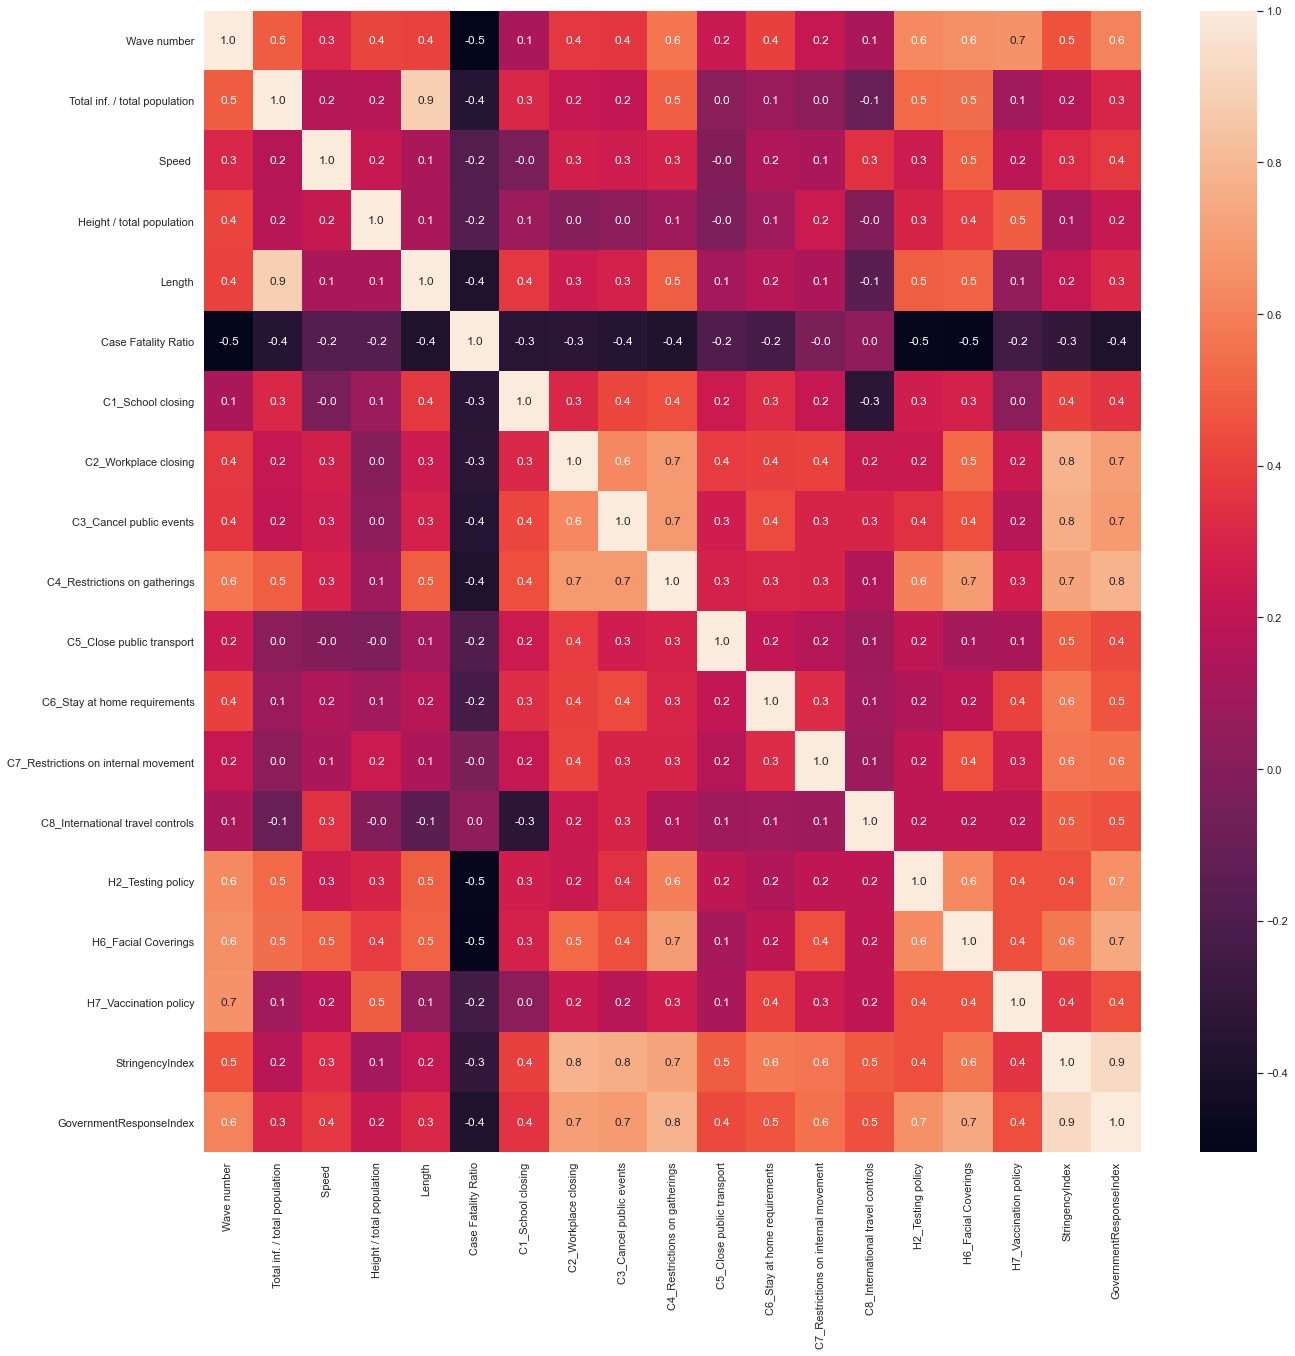

In [18]:
import seaborn as sn
f= plt.subplots(figsize=(21,21))
sn.heatmap(xx.corr(),annot=True,fmt='.1f',color='green')

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(xx)
X_scaled_array = scaler.transform(xx)
xxnorm = pd.DataFrame(X_scaled_array, columns = xx.columns)
xxnorm.head()

Wave number  Total inf. / total population    Speed   \
0    -0.977162                      -1.011154 -0.500121   
1    -0.977162                      -1.099107 -0.401347   
2     0.383201                       0.043495  3.979732   
3     1.743564                       0.059245  2.270541   
4    -0.977162                      -0.991576 -0.530986   

   Height / total population    Length  Case Fatality Ratio  \
0                  -0.492784 -0.478161             2.296740   
1                  -0.474773 -1.333266             3.639485   
2                   0.207459 -0.041512            -0.511987   
3                  -0.025958 -0.296224            -0.580599   
4                  -0.412884 -1.187716             2.702487   

   C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0          -0.511110             -0.166785                -0.905822   
1          -0.511110             -0.166785                 1.103970   
2          -1.236885             -0.166785                -0.905822   
3          -1.236885              1.524890                 1.103970   
4          -1.236885             -0.166785                -0.905822   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                      -0.876254                   0.178820   
1                       0.967125                   0.178820   
2                       0.967125                  -0.975384   
3                       0.967125                  -0.975384   
4                      -0.876254                  -0.975384   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                     -0.025906                              0.495595   
1                     -0.025906                              0.495595   
2                     -0.025906                             -0.342196   
3                      1.813447                              0.495595   
4                     -0.025906                              0.495595   

   C8_International travel controls  H2_Testing policy  H6_Facial Coverings  \
0                         -1.097005          -1.390881            -1.370611   
1                          0.408065          -0.670059            -0.652431   
2                          1.160600           1.492405             1.143019   
3                          1.160600           1.492405             1.502109   
4                          0.784332          -1.390881            -1.370611   

   H7_Vaccination policy  StringencyIndex  GovernmentResponseIndex  
0              -0.465504        -0.405516                -0.679599  
1              -0.465504         0.801251                 0.113528  
2              -0.465504        -0.212826                 0.223609  
3               3.075654         1.095197                 1.111091  
4              -0.465504        -0.230206                -0.607807

# KMEANS 
* silhouette score is separability between clusters

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'Inertia')

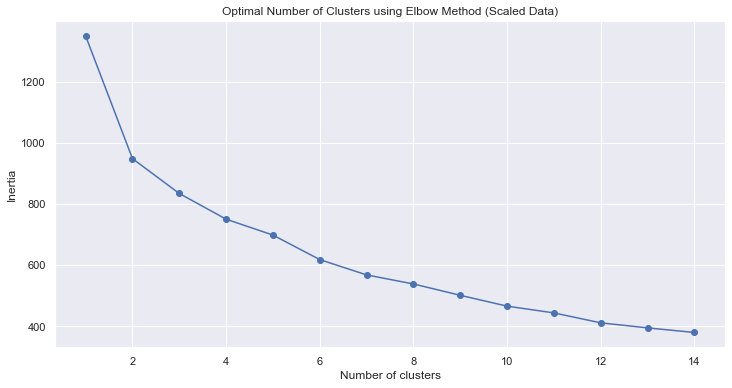

In [20]:
sse = []
k_list = range (1,15)

for k in k_list:
    km = KMeans (n_clusters = k)
    km.fit(xxnorm)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})

plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



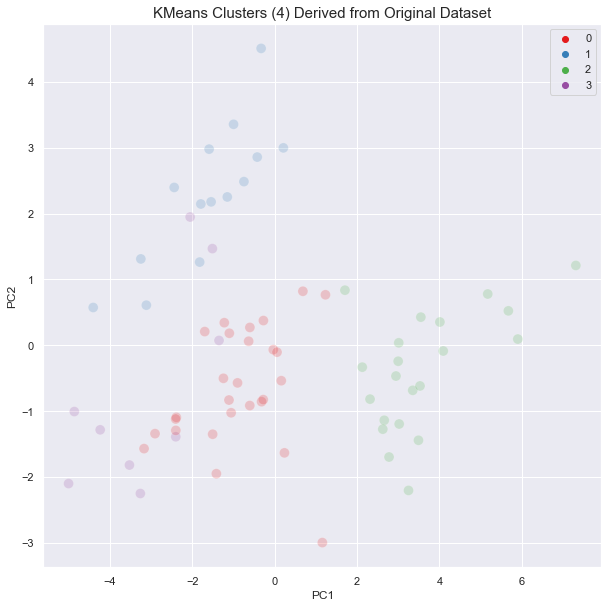

In [22]:
pca2 = PCA(n_components=3).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters ', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [23]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# FEATURE REDUCTION via PCA

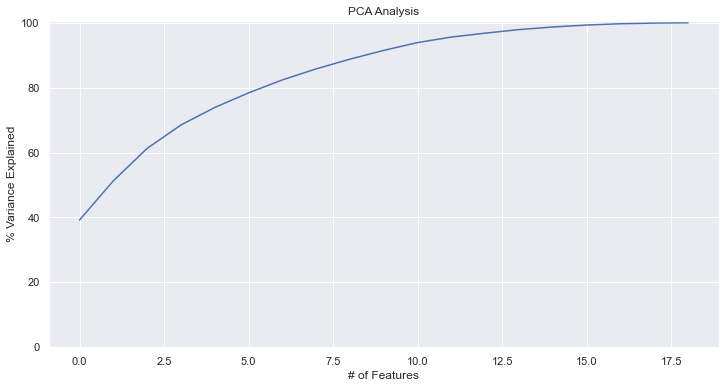

In [24]:
#n_components=7 because we have 7 features in the dataset
pca = PCA(n_components=19)
pca.fit(xxnorm)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [25]:
pca = PCA(n_components=7)
pca_scale = pca.fit_transform(xxnorm)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
print(pca.explained_variance_ratio_)



[0.39211067 0.12081089 0.09984144 0.0722188  0.05389689 0.04507811
 0.03994017]


# Applying KMeans to PCA Principal Components

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'Inertia')

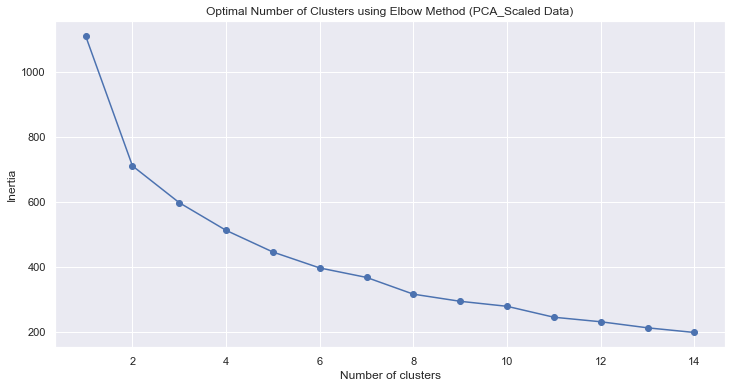

In [26]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.2742991719923421


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



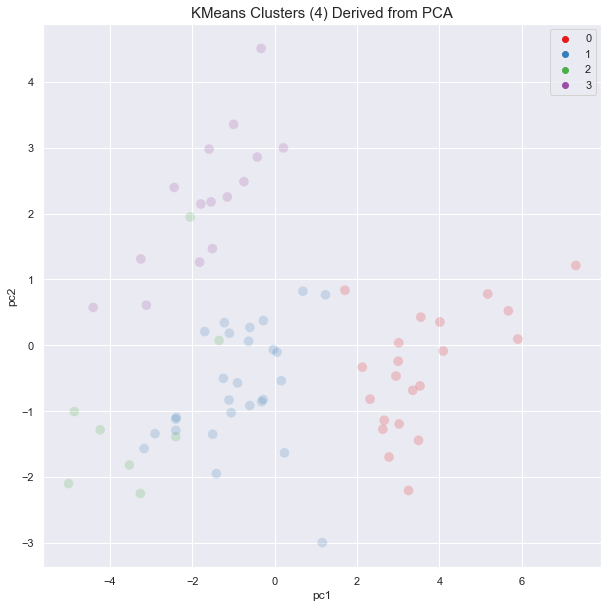

In [28]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

# Feature Reduction via t-SNE

[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.891754
[t-SNE] KL divergence after 2550 iterations: 0.765629


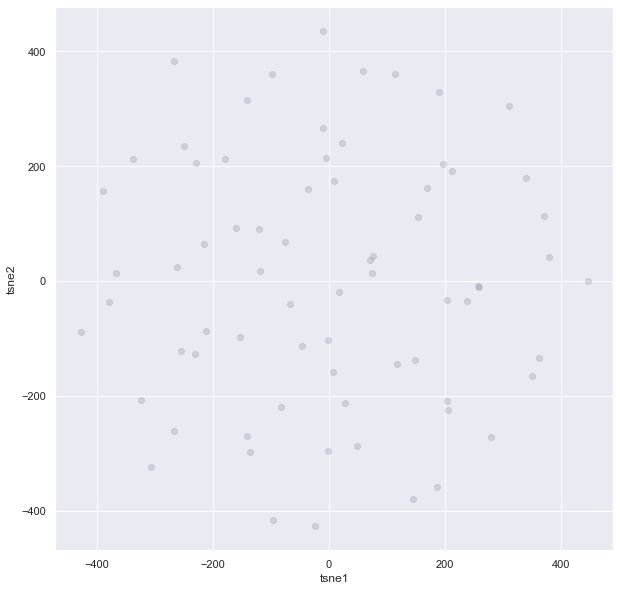

In [29]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(xxnorm)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

# Applying KMeans to t-SNE clusters

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'Inertia')

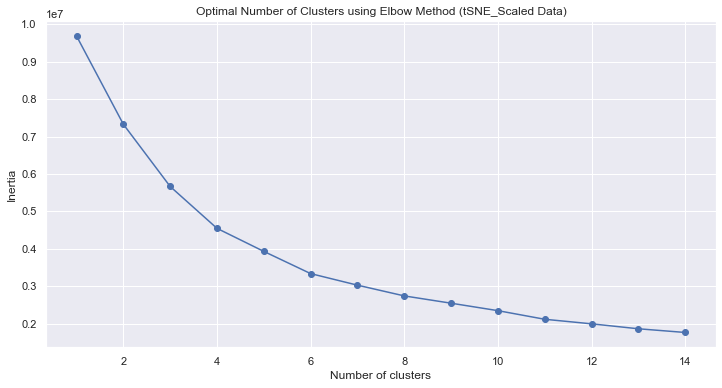

In [30]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [31]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.22798798978328705


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



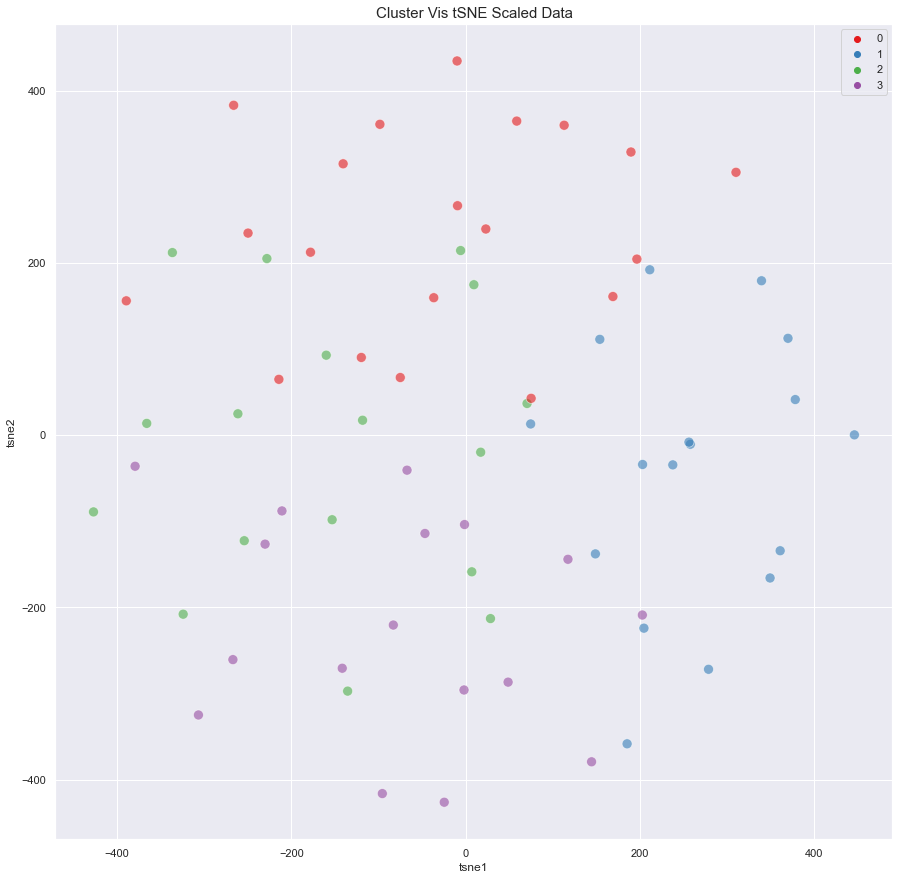

In [32]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

# Comparing PCA and t-SNE Derived KMeans Clusters

In [33]:
cluster_tsne_profile = pd.merge(xx, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_pca_profile = pd.merge(xx, clusters_pca_scale['pca_clusters'], left_index=True, right_index=True )

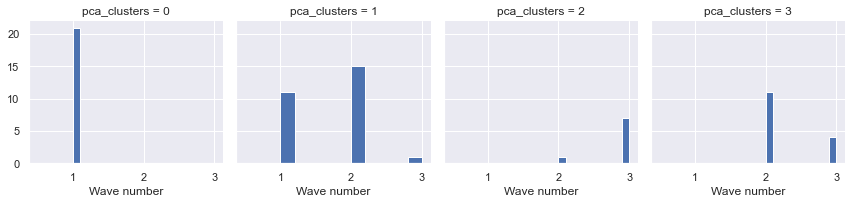

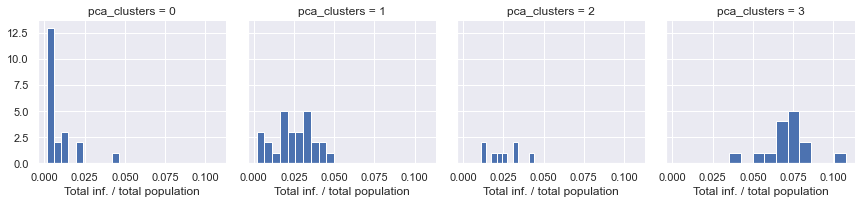

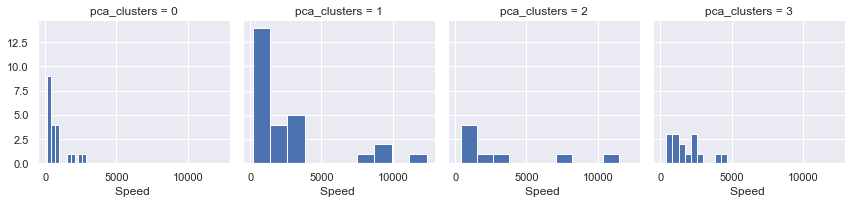

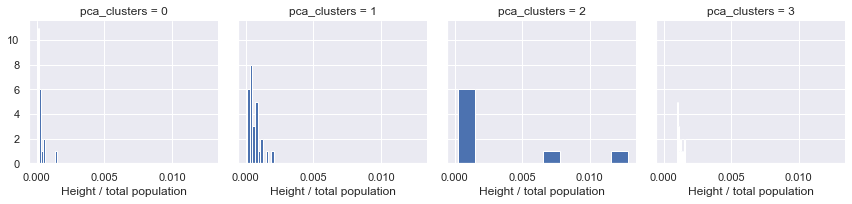

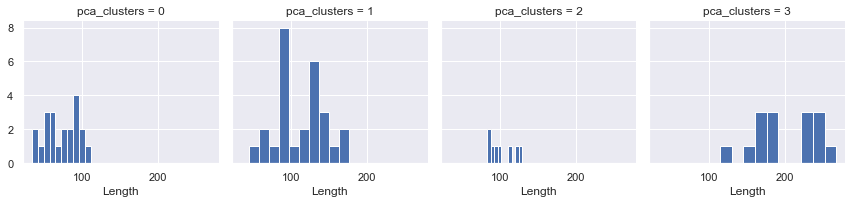

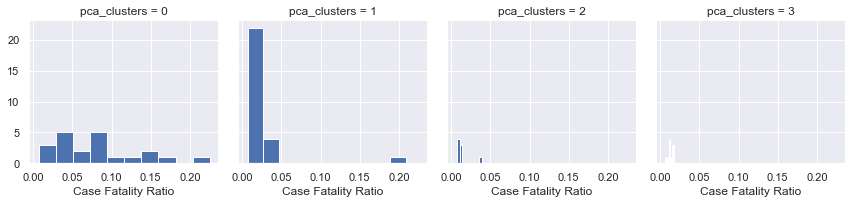

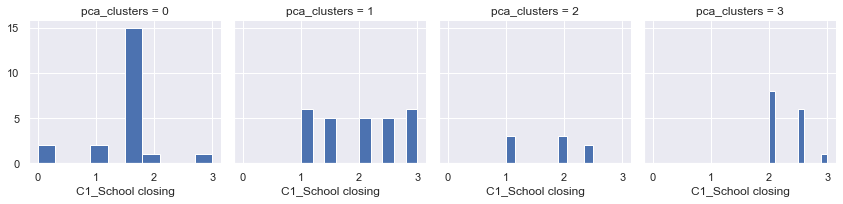

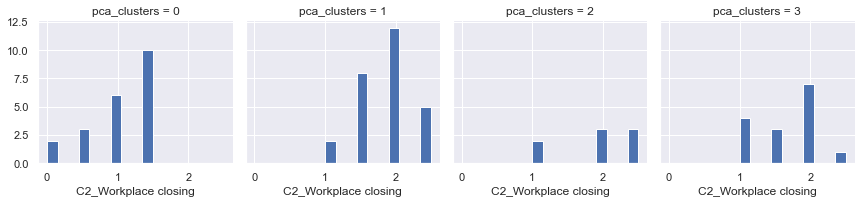

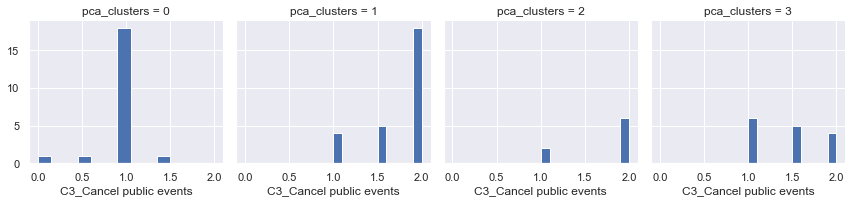

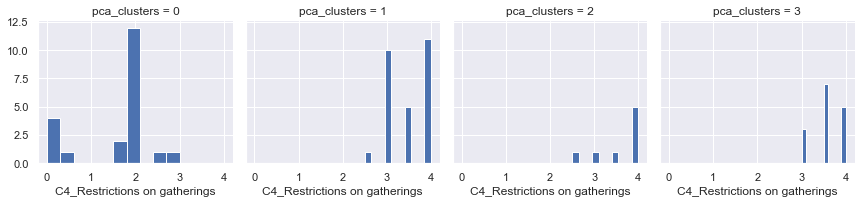

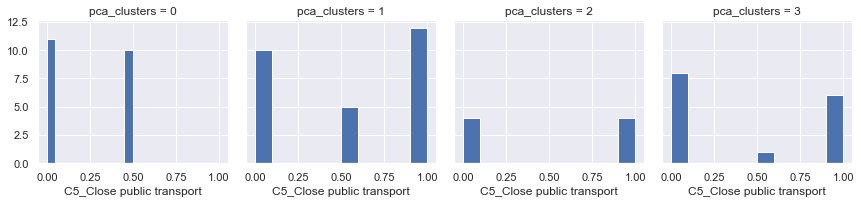

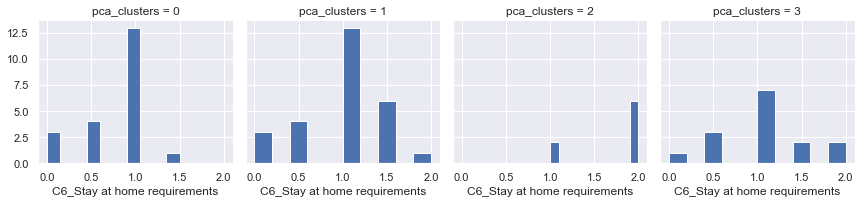

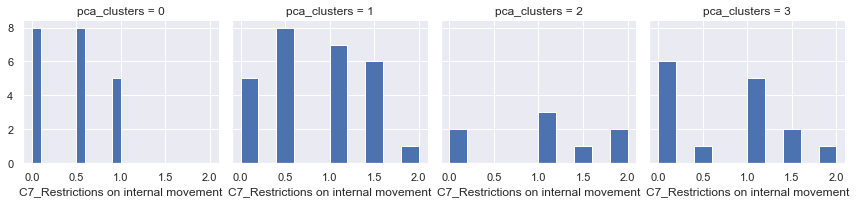

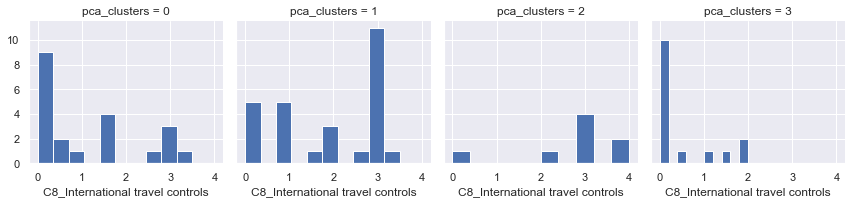

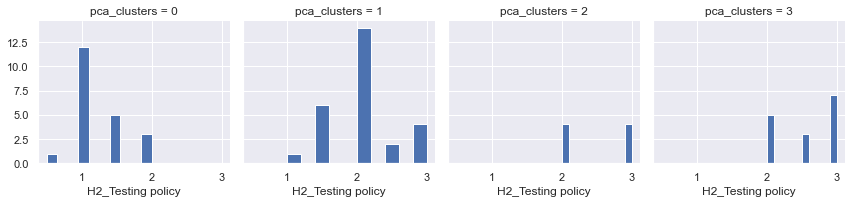

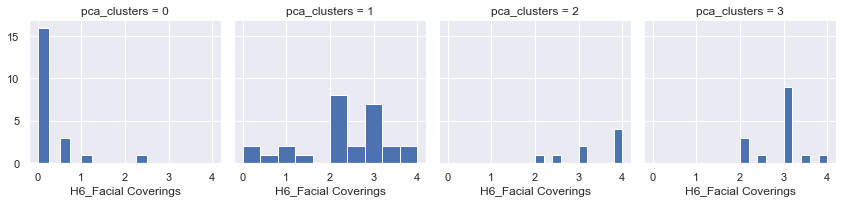

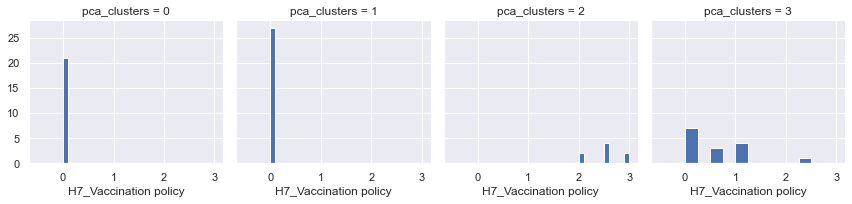

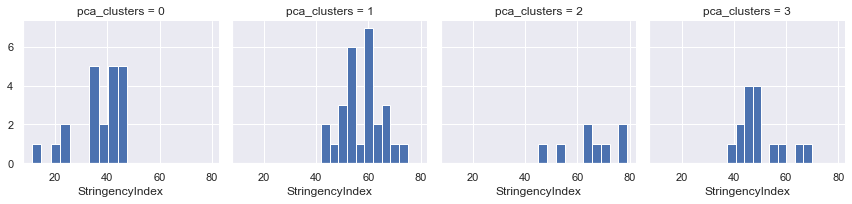

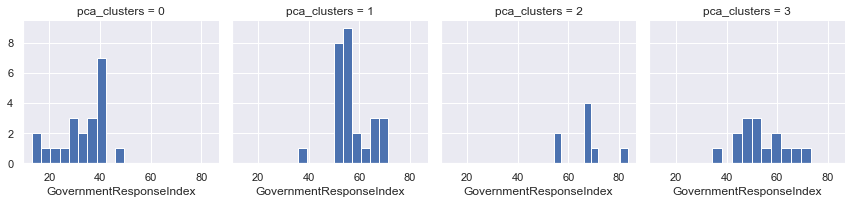

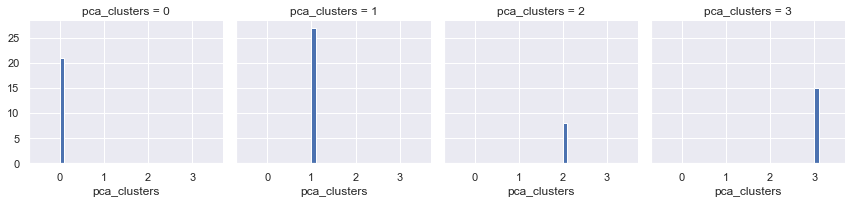

In [34]:
for c in cluster_pca_profile:
    grid = sns.FacetGrid(cluster_pca_profile, col='pca_clusters')
    grid.map(plt.hist, c)

In [233]:
data1 = pd.read_csv('Final_Covid_Feat.csv')


In [234]:
data1

Country  Wave number    Beginning - End  \
0              UK            1   20.Mar - 22. Jun   
1          France            1  15. Mar - 30. Apr   
2          France            2  16. Aug - 12. Dec   
3          France            3  10. Mar - 22. Jun   
4         Belgium            1  18. Mar - 11. May   
..            ...          ...                ...   
66       Michigan            3  23. Feb - 18. Jun   
67  Massachusetts            1  16. Mar - 25. Jun   
68  Massachusetts            2    5. Sep - 2. Mar   
69           Utah            1  28. May - 18. Aug   
70           Utah            2   3. Sep - 31. May   

    Total inf. / total population Highest : Lowest         Speed   \
0                        0.004014        5064 : 646    685.847826   
1                        0.001774       6,887 : 840    943.244444   
2                        0.030864     83,324 : 2100  12360.000000   
3                        0.031265     57,172 : 2044   7905.980392   
4                        0.004512        2454 : 243    605.415094   
..                            ...               ...           ...   
66                       0.035414       10277 : 156   1820.113043   
67                       0.014600        2973 : 149    407.343434   
68                       0.065550        8990 : 586   1512.092486   
69                       0.011699         876 : 207    244.087500   
70                       0.107810        4643 : 140    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    ...  C4_Restrictions on gatherings  C5_Close public transport  \
0   ...                            2.0                        0.5   
1   ...                            4.0                        0.5   
2   ...                            4.0                        0.0   
3   ...                            4.0                        0.0   
4   ...                            2.0                        0.0   
..  ...                            ...                        ...   
66  ...                            3.5                        1.0   
67  ...                            2.0                        0.5   
68  ...                            3.5                        1.0   
69  ...                            3.0                        0.0   
70  ...                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69

In [286]:
## firstly run the "data" part and than the "xx" part

xxx = dataa.iloc[:,1:20] # 1t for rows and second for columns
xxx
#dataa = data1.drop(columns=data1.columns[2])
#dataa = dataa.drop(columns=dataa.columns[3])
#dataa
#data

Wave number  Total inf. / total population        Speed   \
0             1                       0.004014    685.847826   
1             1                       0.001774    943.244444   
2             2                       0.030864  12360.000000   
3             3                       0.031265   7905.980392   
4             1                       0.004512    605.415094   
..          ...                            ...           ...   
66            3                       0.035414   1820.113043   
67            1                       0.014600    407.343434   
68            2                       0.065550   1512.092486   
69            1                       0.011699    244.087500   
70            2                       0.107810    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    C2_Workplace closing  C3_Cancel public events  \
0                    1.5                      1.0   
1                    1.5                      2.0   
2                    1.5                      1.0   
3                    2.5                      2.0   
4                    1.5                      1.0   
..                   ...                      ...   
66                   2.0                      1.0   
67                   1.5                      1.0   
68                   2.0                      1.5   
69                   1.0                      1.5   
70                   1.5                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                             2.0                        0.5   
1                             4.0                        0.5   
2                             4.0                        0.0   
3                             4.0                        0.0   
4                             2.0                        0.0   
..                            ...                        ...   
66                            3.5                        1.0   
67                            2.0                        0.5   
68                            3.5                        1.0   
69                            3.0                        0.0   
70                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69                           1.0                                   0.0   
70                           0.5          

In [323]:
# Add cluster number to the original data
#X_scaled_clustered = pd.DataFrame(xxnorm, columns=xx.columns, index=xx.index)
#X_scaled_clustered['cluster'] = clusters

#X_scaled_clustered.head(50)
X_scaled_clustered = pd.DataFrame(xxx, columns=xxx.columns, index=xxx.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head(50)

Wave number  Total inf. / total population        Speed   \
0             1                       0.004014    685.847826   
1             1                       0.001774    943.244444   
2             2                       0.030864  12360.000000   
3             3                       0.031265   7905.980392   
4             1                       0.004512    605.415094   
5             2                       0.044019   3405.862069   
6             3                       0.024888    567.552083   
7             1                       0.002019    829.758621   
8             2                       0.024450   8761.909774   
9             1                       0.001567    192.588235   
10            2                       0.040382   1249.201550   
11            3                       0.023328    817.823009   
12            1                       0.004907   1595.366667   
13            2                       0.030784   3069.076923   
14            3                       0.010902   2725.488095   
15            1                       0.002718    388.744186   
16            2                       0.030855    874.275862   
17            1                       0.003820    583.101124   
18            2                       0.028981   9625.078652   
19            1                       0.038183   3259.167883   
20            1                       0.046212   2891.855556   
21            1                       0.002388    403.622641   
22            2                       0.024781   3165.616279   
23            1                       0.007070    535.419643   
24            2                       0.050009   2310.161765   
25            1                       0.013709    386.164557   
26            1                       0.005279   2011.838235   
27            2                       0.017535   7744.473684   
28            3                       0.033018  11495.430770   
29            1                       0.036671   1422.951389   
30            2                       0.044311   1933.426230   
31            1                       0.017123    559.021505   
32            1                       0.004787    127.542373   
33            2                       0.009143    219.655914   
34            3                       0.034030    477.803150   
35            1                       0.003260    191.820000   
36            2                       0.025770   1085.455446   
37            3                       0.070482   1572.541126   
38            1                       0.018817   3082.455882   
39            2                       0.071844   4171.005376   
40            1                       0.010697    953.643678   
41            2                       0.083454   1006.570833   
42            3                       0.013830    691.104651   
43            1                       0.028016   1534.880682   
44            2                       0.072425   4681.582960   
45            1                       0.004877    148.662500   
46            2                       0.004520    239.212121   
47            3                       0.066557    506.798913   
48            1                       0.021278   2448.505618   
49            2                       0.082610   2976.170635   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
5                    0.002064      87             0.015713                1.0   
6                    0.000545      96             0.009801                1.0   
7                    0.000083      58             0.044716                2.0   
8         

In [324]:

X_scaled_clustered_3 = X_scaled_clustered.loc[X_scaled_clustered['cluster'] == 3]
X_scaled_clustered_2 = X_scaled_clustered.loc[X_scaled_clustered['cluster'] == 2]
X_scaled_clustered_1 = X_scaled_clustered.loc[X_scaled_clustered['cluster'] == 1]
X_scaled_clustered_0 = X_scaled_clustered.loc[X_scaled_clustered['cluster'] == 0]


In [391]:
X_scaled_clustered_2

Wave number  Total inf. / total population       Speed   \
10            2                       0.040382  1249.201550   
12            1                       0.004907  1595.366667   
24            2                       0.050009  2310.161765   
26            1                       0.005279  2011.838235   
29            1                       0.036671  1422.951389   
30            2                       0.044311  1933.426230   
37            3                       0.070482  1572.541126   
43            1                       0.028016  1534.880682   
55            2                       0.030074  1815.491667   
65            2                       0.055539  1113.124444   
66            3                       0.035414  1820.113043   
68            2                       0.065550  1512.092486   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
10                   0.001064     129             0.017418                1.0   
12                   0.000222      60             0.112147                0.0   
24                   0.001126     136             0.013151                1.5   
26                   0.000166      68             0.010199                1.5   
29                   0.000706     144             0.032446                2.0   
30                   0.001166     122             0.038908                2.5   
37                   0.001241     231             0.017213                2.0   
43                   0.000477     176             0.019352                2.5   
55                   0.000715     120             0.018031                3.0   
65                   0.001006     225             0.017755                2.5   
66                   0.001020     115             0.012663                2.0   
68                   0.001279     173             0.015334                2.5   

    C2_Workplace closing  C3_Cancel public events  \
10                   1.5                      1.5   
12                   0.0                      0.0   
24                   1.5                      2.0   
26                   1.0                      1.0   
29                   1.5                      1.5   
30                   2.5                      2.0   
37                   1.0                      2.0   
43                   2.0                      2.0   
55                   2.5                      2.0   
65                   1.0                      1.0   
66                   2.0                      1.0   
68                   2.0                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
10                            3.0                        0.0   
12                            0.0                        0.0   
24                            3.5                        1.0   
26                            0.0                        0.5   
29                            3.0                        0.5   
30                            4.0                        1.0   
37                            3.0                        0.0   
43                            3.5                        0.0   
55                            4.0                        1.0   
65                            3.5                        1.0   
66                            3.5                        1.0   
68                            3.5                        1.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
10                           1.0                                   1.0   
12                           0.0                                   0.0   
24                           1.0                                   0.5   
26                           1.5                                   0.5   
29                           1.5                                   0.5   
30                           2.0                                   0.0   
37                           2.0                                   0.0   
43             

In [326]:
X_scaled_clustered_3.describe()

Wave number  Total inf. / total population       Speed   \
count    39.000000                      39.000000    39.000000   
mean      1.538462                       0.020979   520.660449   
std       0.755546                       0.025890   269.694358   
min       1.000000                       0.001523   127.542373   
25%       1.000000                       0.004516   277.230212   
50%       1.000000                       0.011699   506.798913   
75%       2.000000                       0.024108   688.476239   
max       3.000000                       0.107810  1085.455446   

       Height / total population      Length  Case Fatality Ratio  \
count                  39.000000   39.000000            39.000000   
mean                    0.000782  101.102564             0.046025   
std                     0.002024   52.211511             0.050829   
min                     0.000060   34.000000             0.005410   
25%                     0.000169   67.500000             0.011001   
50%                     0.000305   90.000000             0.016769   
75%                     0.000581  112.500000             0.060290   
max                     0.012806  268.000000             0.209163   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          39.000000             39.000000                39.000000   
mean            1.833333              1.461538                 1.371795   
std             0.662266              0.600270                 0.469013   
min             0.000000              0.000000                 0.500000   
25%             1.500000              1.000000                 1.000000   
50%             1.500000              1.500000                 1.000000   
75%             2.000000              2.000000                 2.000000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      39.000000                  39.000000   
mean                        2.692308                   0.423077   
std                         1.103913                   0.437373   
min                         0.000000                   0.000000   
25%                         2.000000                   0.000000   
50%                         3.000000                   0.500000   
75%                         3.500000                   1.000000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     39.000000                             39.000000   
mean                       0.948718                              0.615385   
std                        0.470091                              0.601112   
min                        0.000000                              0.000000   
25%                        0.750000                              0.000000   
50%                        1.000000                              0.500000   
75%                        1.000000                              1.000000   
max                        2.000000                              2.000000   

       C8_International travel controls  H2_Testing policy  \
count                         39.000000          39.000000   
mean                           1.089744           1.794872   
std                            1.213259           0.722914   
min                            0.000000           0.500000   
25%                            0.000000           1.000000   
50%                            0.500000           1.500000   
75%                            2.000000           2.250000   
max                            4.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            39.000000              39.000000        39.000000   
mean              1.333333               0.256410        47.375897   
std               1.299460               0.7769

In [327]:
X_scaled_clustered_2.describe()

Wave number  Total inf. / total population       Speed   \
count    12.000000                      12.000000    12.000000   
mean      1.833333                       0.038886  1657.599107   
std       0.717741                       0.020536   336.341996   
min       1.000000                       0.004907  1113.124444   
25%       1.000000                       0.029559  1489.807212   
50%       2.000000                       0.038527  1583.953897   
75%       2.000000                       0.051392  1848.441340   
max       3.000000                       0.070482  2310.161765   

       Height / total population      Length  Case Fatality Ratio  \
count                  12.000000   12.000000            12.000000   
mean                    0.000849  141.583333             0.027051   
std                     0.000388   53.041079             0.028041   
min                     0.000166   60.000000             0.010199   
25%                     0.000649  118.750000             0.014788   
50%                     0.001013  132.500000             0.017587   
75%                     0.001136  173.750000             0.022625   
max                     0.001279  231.000000             0.112147   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          12.000000             12.000000                12.000000   
mean            1.916667              1.541667                 1.458333   
std             0.821123              0.721688                 0.620056   
min             0.000000              0.000000                 0.000000   
25%             1.500000              1.000000                 1.000000   
50%             2.000000              1.500000                 1.500000   
75%             2.500000              2.000000                 2.000000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      12.000000                  12.000000   
mean                        2.875000                   0.583333   
std                         1.383753                   0.468718   
min                         0.000000                   0.000000   
25%                         3.000000                   0.000000   
50%                         3.500000                   0.750000   
75%                         3.500000                   1.000000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     12.000000                             12.000000   
mean                       1.083333                              0.583333   
std                        0.668558                              0.633652   
min                        0.000000                              0.000000   
25%                        0.875000                              0.000000   
50%                        1.000000                              0.500000   
75%                        1.500000                              0.625000   
max                        2.000000                              2.000000   

       C8_International travel controls  H2_Testing policy  \
count                          12.00000          12.000000   
mean                            1.75000           2.125000   
std                             1.58831           0.772393   
min                             0.00000           1.000000   
25%                             0.00000           1.500000   
50%                             1.50000           2.000000   
75%                             3.12500           3.000000   
max                             4.00000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            12.000000              12.000000        12.000000   
mean              1.791667               0.583333        51.379167   
std               1.251514               0.9731

In [328]:
X_scaled_clustered_0.describe()

Wave number  Total inf. / total population        Speed   \
count     6.000000                       6.000000      6.000000   
mean      2.333333                       0.027686   9648.812212   
std       0.516398                       0.005771   1908.489797   
min       2.000000                       0.017535   7744.473684   
25%       2.000000                       0.025583   8119.962738   
50%       2.000000                       0.029923   9193.494213   
75%       2.750000                       0.031165  11027.842741   
max       3.000000                       0.033018  12360.000000   

       Height / total population      Length  Case Fatality Ratio  \
count                   6.000000    6.000000             6.000000   
mean                    0.001897  110.833333             0.015128   
std                     0.002901   18.389308             0.007545   
min                     0.000377   89.000000             0.007778   
25%                     0.000466   96.750000             0.010458   
50%                     0.000779  109.000000             0.012127   
75%                     0.001176  126.500000             0.019025   
max                     0.007778  133.000000             0.027509   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count           6.000000              6.000000                 6.000000   
mean            1.666667              2.000000                 1.833333   
std             0.752773              0.316228                 0.408248   
min             1.000000              1.500000                 1.000000   
25%             1.000000              2.000000                 2.000000   
50%             1.500000              2.000000                 2.000000   
75%             2.375000              2.000000                 2.000000   
max             2.500000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                       6.000000                   6.000000   
mean                        3.666667                   0.500000   
std                         0.516398                   0.447214   
min                         3.000000                   0.000000   
25%                         3.250000                   0.125000   
50%                         4.000000                   0.500000   
75%                         4.000000                   0.875000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                      6.000000                              6.000000   
mean                       1.250000                              0.833333   
std                        0.612372                              0.516398   
min                        0.500000                              0.000000   
25%                        1.000000                              0.625000   
50%                        1.000000                              1.000000   
75%                        1.750000                              1.000000   
max                        2.000000                              1.500000   

       C8_International travel controls  H2_Testing policy  \
count                          6.000000           6.000000   
mean                           2.666667           2.333333   
std                            0.816497           0.516398   
min                            1.000000           2.000000   
25%                            3.000000           2.000000   
50%                            3.000000           2.000000   
75%                            3.000000           2.750000   
max                            3.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count             6.000000               6.000000         6.000000   
mean              3.583333               0.916667        62.340000   
std               0.801041            

In [329]:
X_scaled_clustered_1.describe()

Wave number  Total inf. / total population       Speed   \
count    14.000000                      14.000000    14.000000   
mean      1.857143                       0.047272  3081.286391   
std       0.662994                       0.023890   667.198795   
min       1.000000                       0.010902  2377.124224   
25%       1.250000                       0.026281  2558.172643   
50%       2.000000                       0.045116  3022.623779   
75%       2.000000                       0.070421  3235.779982   
max       3.000000                       0.082610  4681.582960   

       Height / total population      Length  Case Fatality Ratio  \
count                  14.000000   14.000000            14.000000   
mean                    0.000949  149.357143             0.033559   
std                     0.000506   59.736095             0.057529   
min                     0.000252   84.000000             0.006630   
25%                     0.000595   89.250000             0.012307   
50%                     0.000984  140.000000             0.014522   
75%                     0.001116  183.250000             0.016998   
max                     0.002064  252.000000             0.225283   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          14.000000             14.000000                14.000000   
mean            1.928571              1.857143                 1.500000   
std             0.703211              0.412710                 0.480384   
min             1.000000              1.000000                 1.000000   
25%             1.500000              1.500000                 1.000000   
50%             2.000000              2.000000                 1.500000   
75%             2.500000              2.000000                 2.000000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      14.000000                  14.000000   
mean                        3.428571                   0.250000   
std                         0.675310                   0.379777   
min                         2.000000                   0.000000   
25%                         3.000000                   0.000000   
50%                         3.750000                   0.000000   
75%                         4.000000                   0.500000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     14.000000                               14.0000   
mean                       1.035714                                1.0000   
std                        0.634407                                0.5547   
min                        0.000000                                0.0000   
25%                        0.625000                                0.6250   
50%                        1.000000                                1.0000   
75%                        1.500000                                1.0000   
max                        2.000000                                2.0000   

       C8_International travel controls  H2_Testing policy  \
count                         14.000000          14.000000   
mean                           1.714286           2.142857   
std                            1.311404           0.534522   
min                            0.000000           1.000000   
25%                            0.250000           2.000000   
50%                            1.750000           2.000000   
75%                            3.000000           2.000000   
max                            3.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            14.000000              14.000000        14.000000   
mean              2.892857               0.392857        54.574286   
std               0.858858               0.5941

In [330]:
# obviously the speed is the greatest within cluster 3 where most of waves are waves 3.


In [331]:
wave_3 = X_scaled_clustered.loc[X_scaled_clustered['Wave number'] == 3]
wave_2 = X_scaled_clustered.loc[X_scaled_clustered['Wave number'] == 2]
wave_1 = X_scaled_clustered.loc[X_scaled_clustered['Wave number'] == 1]

wave_3.describe()

Wave number  Total inf. / total population        Speed   \
count         12.0                      12.000000     12.000000   
mean           3.0                       0.036585   2625.657417   
std            0.0                       0.021976   3484.129485   
min            3.0                       0.010902    424.852941   
25%            3.0                       0.022606    552.363791   
50%            3.0                       0.032142   1195.182067   
75%            3.0                       0.043200   2558.172643   
max            3.0                       0.074868  11495.430770   

       Height / total population      Length  Case Fatality Ratio  \
count                  12.000000   12.000000            12.000000   
mean                    0.002436  133.333333             0.011916   
std                     0.003842   55.303022             0.002939   
min                     0.000252   84.000000             0.007665   
25%                     0.000541   94.500000             0.010253   
50%                     0.000998  114.000000             0.011948   
75%                     0.001347  143.500000             0.013083   
max                     0.012806  242.000000             0.017213   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          12.000000             12.000000                12.000000   
mean            1.833333              1.833333                 1.625000   
std             0.536543              0.577350                 0.482654   
min             1.000000              1.000000                 1.000000   
25%             1.750000              1.375000                 1.000000   
50%             2.000000              2.000000                 2.000000   
75%             2.000000              2.125000                 2.000000   
max             2.500000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      12.000000                  12.000000   
mean                        3.583333                   0.541667   
std                         0.514929                   0.498102   
min                         2.500000                   0.000000   
25%                         3.375000                   0.000000   
50%                         3.750000                   0.750000   
75%                         4.000000                   1.000000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     12.000000                             12.000000   
mean                       1.541667                              0.958333   
std                        0.655686                              0.721688   
min                        0.000000                              0.000000   
25%                        1.000000                              0.375000   
50%                        2.000000                              1.000000   
75%                        2.000000                              1.500000   
max                        2.000000                              2.000000   

       C8_International travel controls  H2_Testing policy  \
count                         12.000000          12.000000   
mean                           1.708333           2.500000   
std                            1.573334           0.522233   
min                            0.000000           2.000000   
25%                            0.000000           2.000000   
50%                            2.250000           2.500000   
75%                            3.000000           3.000000   
max                            4.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            12.000000              12.000000        12.000000   
mean              3.041667               1.791667        58.780000   
std               0.810677            

In [332]:
wave_2.describe()

Wave number  Total inf. / total population        Speed   \
count         27.0                      27.000000     27.000000   
mean           2.0                       0.047646   2985.398340   
std            0.0                       0.025790   3127.202075   
min            2.0                       0.004520    219.655914   
25%            2.0                       0.029527    940.423348   
50%            2.0                       0.044019   1933.426230   
75%            2.0                       0.068998   3285.739174   
max            2.0                       0.107810  12360.000000   

       Height / total population      Length  Case Fatality Ratio  \
count                  27.000000   27.000000            27.000000   
mean                    0.000960  148.370370             0.014745   
std                     0.000445   56.332903             0.006698   
min                     0.000140   66.000000             0.005410   
25%                     0.000665   98.000000             0.011120   
50%                     0.001006  136.000000             0.013636   
75%                     0.001215  177.000000             0.016702   
max                     0.002064  268.000000             0.038908   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          27.000000             27.000000                27.000000   
mean            2.037037              1.814815                 1.648148   
std             0.649348              0.463020                 0.411723   
min             1.000000              1.000000                 1.000000   
25%             1.500000              1.500000                 1.500000   
50%             2.000000              2.000000                 2.000000   
75%             2.500000              2.000000                 2.000000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      27.000000                  27.000000   
mean                        3.574074                   0.518519   
std                         0.431983                   0.489927   
min                         3.000000                   0.000000   
25%                         3.000000                   0.000000   
50%                         3.500000                   0.500000   
75%                         4.000000                   1.000000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     27.000000                             27.000000   
mean                       0.962963                              0.740741   
std                        0.478899                              0.655896   
min                        0.000000                              0.000000   
25%                        0.750000                              0.000000   
50%                        1.000000                              1.000000   
75%                        1.000000                              1.000000   
max                        2.000000                              2.000000   

       C8_International travel controls  H2_Testing policy  \
count                         27.000000          27.000000   
mean                           1.574074           2.333333   
std                            1.370736           0.518875   
min                            0.000000           1.000000   
25%                            0.000000           2.000000   
50%                            1.500000           2.000000   
75%                            3.000000           3.000000   
max                            4.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            27.000000              27.000000        27.000000   
mean              2.648148               0.240741        55.229630   
std               0.998218            

In [333]:
wave_1.describe()

Wave number  Total inf. / total population       Speed   \
count         32.0                      32.000000    32.000000   
mean           1.0                       0.012102   909.818293   
std            0.0                       0.011696   905.471761   
min            1.0                       0.001523   127.542373   
25%            1.0                       0.003965   279.794593   
50%            1.0                       0.006639   571.061314   
75%            1.0                       0.017546  1070.970606   
max            1.0                       0.046212  3259.167883   

       Height / total population      Length  Case Fatality Ratio  \
count                  32.000000   32.000000            32.000000   
mean                    0.000319   87.250000             0.066847   
std                     0.000280   36.085025             0.058707   
min                     0.000060   34.000000             0.007069   
25%                     0.000161   58.750000             0.023132   
50%                     0.000217   85.000000             0.044329   
75%                     0.000434   99.750000             0.083248   
max                     0.001463  176.000000             0.225283   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          32.000000             32.000000                32.000000   
mean            1.703125              1.328125                 1.218750   
std             0.760511              0.603877                 0.490844   
min             0.000000              0.000000                 0.000000   
25%             1.500000              1.000000                 1.000000   
50%             1.500000              1.500000                 1.000000   
75%             2.000000              1.500000                 1.500000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      32.000000                  32.000000   
mean                        2.187500                   0.296875   
std                         1.162242                   0.332619   
min                         0.000000                   0.000000   
25%                         2.000000                   0.000000   
50%                         2.000000                   0.250000   
75%                         3.000000                   0.500000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     32.000000                             32.000000   
mean                       0.859375                              0.578125   
std                        0.444217                              0.477044   
min                        0.000000                              0.000000   
25%                        0.500000                              0.000000   
50%                        1.000000                              0.500000   
75%                        1.000000                              1.000000   
max                        1.500000                              1.500000   

       C8_International travel controls  H2_Testing policy  \
count                         32.000000          32.000000   
mean                           1.265625           1.453125   
std                            1.231210           0.529141   
min                            0.000000           0.500000   
25%                            0.000000           1.000000   
50%                            1.000000           1.500000   
75%                            2.125000           1.625000   
max                            3.500000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  \
count            32.000000                   32.0        32.000000   
mean              0.859375                    0.0        43.929062   
std               1.123319                    0

Stringency index gets progresivelly larger on average
as wave number goes from 1 to 3, so the strictness of lockdown goes up. It is the same with government response index which is larger, better. 
So social restrictions are more restrictive.
Also, height of the waves increases as waves go from 1 to 3. 
Number of infected was lowest when the stringency was lowest. Also speed  was by far the lowest in
wave 1. As well as the length.
Unfortunately, case fatality was by far the highest, maybe due to unpreparedness of the equipment and the mistery around how harmful the virus is. Testing policy was the lowest tho, this follows. This is why less people were admitted to hospitals on time.

In [ ]:
when u say fat rate drops, before that fat rate is going up! Its not reduction, but its about the increase of 
fatality rate before the trop. this is readson for stronger lockdown measures. 
This lockdown is never a measure to change things, its only a reaction to a situation to make it possible
for lockdown. the process of everyting going up is making the uslove for lockdown. 
Make sure to point out that this is one of the possible stories

# analyse the meaning of clusters
* try to rank them by "goodness" of waves
* is cluster 1 better than 2 and why, for example
* try to make sense of them
* think about how to tell a story to the reader
* important knowledge that can be extracted to make sense
* what could be important for the goodness of these clusters/waves
* table of clusters and countries corresponding to the clusters, maybe interesting results
* or table of number of waves, is second always bad, is third always better than second and so on
* DIG FOR INFO. SOMETHING TO TALK ABOUT.
* MAKE SENSE OF RESULTS BEFORE GOING FURTHER INTO MACHINE LEARNING
* think to advise if social lockdown is important or not?
* RANK IMPORTANCE OF FEATURES FOR OUTPUT FEATURE (by choice)
* do clusters make sense in real life? Figure out why they are clustered. If you can't, analysis is not credible. Make as much sense out of them as you can and do feature analysis.
* 3 Questions - are there good and bad waves, what are they? And which features are more important - social and covid.
* can we predict the next one?

* remember to start with these tables mentioned. Make sense of them. Which clusters are representative of good scenarios or bad. Which ones to you want to be in? 
* case studies are important also. Latest NY and UK waves for example, they are diff, and they should be in diff clusters. So similar waves should be in same clusters, just test your results this way. 

# SUPERVISED LEARNING SVM 
** svm for output feature stringency index

In [394]:
xxnorm = xxnorm.select_dtypes(exclude=['object'])
xxnorm=xxnorm.fillna(xxnorm.mean())
X = xxnorm.drop('Case Fatality Ratio',axis=1)
y = xxnorm['Case Fatality Ratio']

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [396]:
from sklearn.svm import SVR

In [419]:
svr = SVR(kernel = 'linear',C = 1000)

In [416]:
svr.fit(X_train,y_train)
y_test_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

In [417]:
y_test_pred

array([-9.281e-01, -3.013e-01, -6.417e-01, -2.023e-01, -7.843e-04,
        7.741e-01, -1.107e+00, -2.679e-01,  4.377e-01,  2.731e+00,
        2.023e+00])

In [418]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8487625366146634

In [420]:
r2_score(y_test,y_test_pred)

0.929967413897624

# another svr way, better obv

In [402]:
SupportVectorRegModel = SVR()

In [403]:
SupportVectorRegModel.fit(X_train, y_train)

SVR()

In [404]:
y_pred = SupportVectorRegModel.predict(X_test)
y_pred

array([-0.662, -0.006, -0.757,  0.114, -0.013,  0.811, -0.965, -0.665,
        0.061,  1.597,  1.795])

# RANK FEATURES BY IMPORTANCE







In [83]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [84]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[0.742 0.536 2.449 9.433 0.782 0.39  0.742 1.858 1.621 0.925 1.653 2.038
 1.429 0.661 0.629 0.933 0.902 6.755]
[[-0.5   -0.493 -0.026 -0.68 ]
 [-0.401 -0.475 -0.026  0.114]
 [ 3.98   0.207 -0.026  0.224]
 [ 2.271 -0.026  1.813  1.111]
 [-0.531 -0.413 -0.026 -0.608]]


In [85]:
xxnorm

Wave number  Total inf. / total population    Speed   \
0     -0.977162                      -1.011154 -0.500121   
1     -0.977162                      -1.099107 -0.401347   
2      0.383201                       0.043495  3.979732   
3      1.743564                       0.059245  2.270541   
4     -0.977162                      -0.991576 -0.530986   
..          ...                            ...       ...   
66     1.743564                       0.222195 -0.064857   
67    -0.977162                      -0.595334 -0.606994   
68     0.383201                       1.405888 -0.183057   
69    -0.977162                      -0.709270 -0.669642   
70     0.383201                       3.065758 -0.593786   

    Height / total population    Length  Case Fatality Ratio  \
0                   -0.492784 -0.478161             2.296740   
1                   -0.474773 -1.333266             3.639485   
2                    0.207459 -0.041512            -0.511987   
3                   -0.025958 -0.296224            -0.580599   
4                   -0.412884 -1.187716             2.702487   
..                        ...       ...                  ...   
66                   0.057895 -0.059706            -0.532650   
67                  -0.289860 -0.350805             0.837282   
68                   0.208790  0.995529            -0.475934   
69                  -0.380248 -0.696486            -0.646184   
70                   0.290561  2.723931            -0.686648   

    C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0           -0.511110             -0.166785                -0.905822   
1           -0.511110             -0.166785                 1.103970   
2           -1.236885             -0.166785                -0.905822   
3           -1.236885              1.524890                 1.103970   
4           -1.236885             -0.166785                -0.905822   
..                ...                   ...                      ...   
66           0.214666              0.679053                -0.905822   
67          -0.511110             -0.166785                -0.905822   
68           0.940442              0.679053                 0.099074   
69           1.666217             -1.012623                 0.099074   
70           0.214666             -0.166785                 0.099074   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                       -0.876254                   0.178820   
1                        0.967125                   0.178820   
2                        0.967125                  -0.975384   
3                        0.967125                  -0.975384   
4                       -0.876254                  -0.975384   
..                            ...                        ...   
66                       0.506280                   1.333025   
67                      -0.876254                   0.178820   
68                       0.506280                   1.333025   
69                       0.045435                  -0.975384   
70                       0.506280                  -0.975384   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                      -0.025906                              0.495595   
1                      -0.025906                              0.495595   
2                      -0.025906                             -0.342196   
3                       1.813447                              0.495595   
4                      -0.025906                              0.495595   
..                           ...                                   ...   
66                     -1.865260                             -0.342196   
67                     -0.025906                             -0.342196   
68                     -0.025906                              1.333386   
69                     -0.025906                             -1.179987   
70                     -0.945583                             -1.17

In [86]:
#18 not count, 4, 3, 12  

In [87]:
# height and speed are two most important for stringency index.

In [88]:
## trying a different output such as FATALITY RATIO

In [351]:
xxnorm = xxnorm.select_dtypes(exclude=['object'])
xxnorm=xxnorm.fillna(xxnorm.mean())
XXXfat = xxnorm.drop('Total inf. / total population',axis=1)
yyyfat = xxnorm['Total inf. / total population']

Feature: 0, Score: 0.00165
Feature: 1, Score: 0.01135
Feature: 2, Score: 0.58064
Feature: 3, Score: 0.35050
Feature: 4, Score: 0.01072
Feature: 5, Score: 0.00110
Feature: 6, Score: 0.00125
Feature: 7, Score: 0.00427
Feature: 8, Score: 0.00157
Feature: 9, Score: 0.00196
Feature: 10, Score: 0.00188
Feature: 11, Score: 0.00361
Feature: 12, Score: 0.01194
Feature: 13, Score: 0.00193
Feature: 14, Score: 0.00431
Feature: 15, Score: 0.00118
Feature: 16, Score: 0.00923
Feature: 17, Score: 0.00089


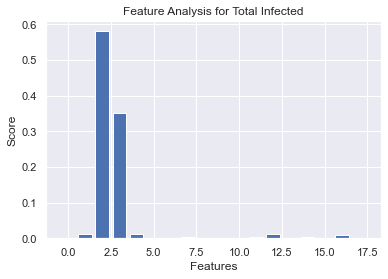

In [354]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
XXXfat, yyyfat = make_regression(n_samples=1000, n_features=19, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(XXfat, yyfat)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature Analysis for Total Infected')
plt.xlabel('Features')
plt.ylabel('Score')
pyplot.show()

In [251]:
X_scaled_clustered = X_scaled_clustered.select_dtypes(exclude=['object'])
X_scaled_clustered=X_scaled_clustered.fillna(X_scaled_clustered.mean())
XXfat = X_scaled_clustered.drop('Total inf. / total population',axis=1)
yyfat = X_scaled_clustered['Total inf. / total population']

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(XXfat,yyfat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(XXfat.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Unknown label type: (array([0.004, 0.002, 0.031, 0.031, 0.005, 0.044, 0.025, 0.002, 0.024,
       0.002, 0.04 , 0.023, 0.005, 0.031, 0.011, 0.003, 0.031, 0.004,
       0.029, 0.038, 0.046, 0.002, 0.025, 0.007, 0.05 , 0.014, 0.005,
       0.018, 0.033, 0.037, 0.044, 0.017, 0.005, 0.009, 0.034, 0.003,
       0.026, 0.07 , 0.019, 0.072, 0.011, 0.083, 0.014, 0.028, 0.072,
       0.005, 0.005, 0.067, 0.021, 0.083, 0.007, 0.035, 0.02 , 0.072,
       0.002, 0.03 , 0.075, 0.017, 0.066, 0.02 , 0.059, 0.005, 0.079,
       0.02 , 0.006, 0.056, 0.035, 0.015, 0.066, 0.012, 0.108]),)

In [254]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(XXfat,yyfat)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XXfat.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: Unknown label type: 'continuous'

3, 16, 2, 19
### check these features in a list and for each of them rank the waves from best to 
### worst. Then try to decide which clusters are worst and which are better, and is 
### obvious which waves tend to fall into which cluster.
 for clusters - features by importance, contribution:
* Speed
* Facial coverings
* Total inf
* length


In [255]:
X_scaled_clustered

Wave number  Total inf. / total population        Speed   \
0             1                       0.004014    685.847826   
1             1                       0.001774    943.244444   
2             2                       0.030864  12360.000000   
3             3                       0.031265   7905.980392   
4             1                       0.004512    605.415094   
..          ...                            ...           ...   
66            3                       0.035414   1820.113043   
67            1                       0.014600    407.343434   
68            2                       0.065550   1512.092486   
69            1                       0.011699    244.087500   
70            2                       0.107810    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    C2_Workplace closing  C3_Cancel public events  \
0                    1.5                      1.0   
1                    1.5                      2.0   
2                    1.5                      1.0   
3                    2.5                      2.0   
4                    1.5                      1.0   
..                   ...                      ...   
66                   2.0                      1.0   
67                   1.5                      1.0   
68                   2.0                      1.5   
69                   1.0                      1.5   
70                   1.5                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                             2.0                        0.5   
1                             4.0                        0.5   
2                             4.0                        0.0   
3                             4.0                        0.0   
4                             2.0                        0.0   
..                            ...                        ...   
66                            3.5                        1.0   
67                            2.0                        0.5   
68                            3.5                        1.0   
69                            3.0                        0.0   
70                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69                           1.0                                   0.0   
70                           0.5          

In [338]:
dataFrame = pd.DataFrame(data = X_scaled_clustered, columns = ['Wave number',	'Total inf. / total population','Speed',	'Height / total population',	'Length',	'Case Fatality Ratio',	'C1_School closing',	'C2_Workplace closing',	'C3_Cancel public events',	'C4_Restrictions on gatherings',	'C5_Close public transport',	'C6_Stay at home requirements',	'C7_Restrictions on internal movement',	'C8_International travel controls',	'H2_Testing policy',	'H6_Facial Coverings',	'H7_Vaccination policy'	,'StringencyIndex',	'cluster'])
   
# Converting Pandas DataFrame
# into CSV file
dataFrame.to_csv('CLUSTERED3.csv')

In [265]:
data_country_2

Unnamed: 0  Wave number  Total inf. / total population  Speed  \
0            0            1                       0.004014    NaN   
1            1            1                       0.001774    NaN   
2            2            2                       0.030864    NaN   
3            3            3                       0.031265    NaN   
4            4            1                       0.004512    NaN   
..         ...          ...                            ...    ...   
66          66            3                       0.035414    NaN   
67          67            1                       0.014600    NaN   
68          68            2                       0.065550    NaN   
69          69            1                       0.011699    NaN   
70          70            2                       0.107810    NaN   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    C2_Workplace closing  C3_Cancel public events  \
0                    1.5                      1.0   
1                    1.5                      2.0   
2                    1.5                      1.0   
3                    2.5                      2.0   
4                    1.5                      1.0   
..                   ...                      ...   
66                   2.0                      1.0   
67                   1.5                      1.0   
68                   2.0                      1.5   
69                   1.0                      1.5   
70                   1.5                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                             2.0                        0.5   
1                             4.0                        0.5   
2                             4.0                        0.0   
3                             4.0                        0.0   
4                             2.0                        0.0   
..                            ...                        ...   
66                            3.5                        1.0   
67                            2.0                        0.5   
68                            3.5                        1.0   
69                            3.0                        0.0   
70                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69                           1.0                        

In [258]:
XXfat

Wave number        Speed   Height / total population  Length  \
0             1    685.847826                   0.000075      92   
1             1    943.244444                   0.000106      45   
2             2  12360.000000                   0.001277     116   
3             3   7905.980392                   0.000876     102   
4             1    605.415094                   0.000212      53   
..          ...           ...                        ...     ...   
66            3   1820.113043                   0.001020     115   
67            1    407.343434                   0.000423      99   
68            2   1512.092486                   0.001279     173   
69            1    244.087500                   0.000268      80   
70            2    441.764925                   0.001419     268   

    Case Fatality Ratio  C1_School closing  C2_Workplace closing  \
0              0.145922                1.5                   1.5   
1              0.209163                1.5                   1.5   
2              0.013636                1.0                   1.5   
3              0.010404                1.0                   2.5   
4              0.165032                1.0                   1.5   
..                  ...                ...                   ...   
66             0.012663                2.0                   2.0   
67             0.077184                1.5                   1.5   
68             0.015334                2.5                   2.0   
69             0.007315                3.0                   1.0   
70             0.005410                2.0                   1.5   

    C3_Cancel public events  C4_Restrictions on gatherings  \
0                       1.0                            2.0   
1                       2.0                            4.0   
2                       1.0                            4.0   
3                       2.0                            4.0   
4                       1.0                            2.0   
..                      ...                            ...   
66                      1.0                            3.5   
67                      1.0                            2.0   
68                      1.5                            3.5   
69                      1.5                            3.0   
70                      1.5                            3.5   

    C5_Close public transport  C6_Stay at home requirements  \
0                         0.5                           1.0   
1                         0.5                           1.0   
2                         0.0                           1.0   
3                         0.0                           2.0   
4                         0.0                           1.0   
..                        ...                           ...   
66                        1.0                           0.0   
67                        0.5                           1.0   
68                        1.0                           1.0   
69                        0.0                           1.0   
70                        0.0                           0.5   

    C7_Restrictions on internal movement  C8_International travel controls  \
0                                    1.0                               0.0   
1                                    1.0                               2.0   
2                                    0.5                               3.0   
3                                    1.0                               3.0   
4                                    1.0                               2.5   
..                                   ...                               ...   
66                                   0.5                               0.0   
67                                   0.5                               0.0   
68                                   1.5                               2.0   
69                                   0.0                               0.0   
70        

# FIND which countries belong to which cluster


In [93]:
data_country = pd.read_csv('CLUSTERED.csv')

In [94]:
data_country

Unnamed: 0  cluster
0              UK        1
1          France        2
2          France        0
3          France        3
4         Belgium        1
..            ...      ...
66       Michigan        0
67  Massachusetts        1
68  Massachusetts        0
69           Utah        1
70           Utah        0

[71 rows x 2 columns]

In [95]:
#data_country.loc[data_country['cluster'] == 2]

# joining to add country to x_scaled_clustered

In [339]:
data_country_2 = pd.read_csv('CLUSTERED3.csv')

In [340]:
data_country_2

Unnamed: 0  Wave number  cluster  Total inf. / total population  \
0              UK            1        3                       0.004014   
1          France            1        3                       0.001774   
2          France            2        1                       0.030864   
3          France            3        1                       0.031265   
4         Belgium            1        3                       0.004512   
..            ...          ...      ...                            ...   
66       Michigan            3        2                       0.035414   
67  Massachusetts            1        3                       0.014600   
68  Massachusetts            2        2                       0.065550   
69           Utah            1        3                       0.011699   
70           Utah            2        3                       0.107810   

           Speed  Height / total population  Length  Case Fatality Ratio  \
0     685.847826                   0.000075      92             0.145922   
1     943.244444                   0.000106      45             0.209163   
2   12360.000000                   0.001277     116             0.013636   
3    7905.980392                   0.000876     102             0.010404   
4     605.415094                   0.000212      53             0.165032   
..           ...                        ...     ...                  ...   
66   1820.113043                   0.001020     115             0.012663   
67    407.343434                   0.000423      99             0.077184   
68   1512.092486                   0.001279     173             0.015334   
69    244.087500                   0.000268      80             0.007315   
70    441.764925                   0.001419     268             0.005410   

    C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                 1.5                   1.5                      1.0   
1                 1.5                   1.5                      2.0   
2                 1.0                   1.5                      1.0   
3                 1.0                   2.5                      2.0   
4                 1.0                   1.5                      1.0   
..                ...                   ...                      ...   
66                2.0                   2.0                      1.0   
67                1.5                   1.5                      1.0   
68                2.5                   2.0                      1.5   
69                3.0                   1.0                      1.5   
70                2.0                   1.5                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
0                             2.0                        0.5   
1                             4.0                        0.5   
2                             4.0                        0.0   
3                             4.0                        0.0   
4                             2.0                        0.0   
..                            ...                        ...   
66                            3.5                        1.0   
67                            2.0                        0.5   
68                            3.5                        1.0   
69                            3.0                        0.0   
70                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                     

In [341]:
country_0 = data_country_2.loc[data_country_2['cluster'] == 0]
country_1 = data_country_2.loc[data_country_2['cluster'] == 1]
country_2 = data_country_2.loc[data_country_2['cluster'] == 2]
country_3 = data_country_2.loc[data_country_2['cluster'] == 3]

In [393]:
country_1.describe()

Wave number  cluster  Total inf. / total population        Speed  \
count    14.000000     14.0                      14.000000    14.000000   
mean      1.857143      0.0                       0.047272  3081.286391   
std       0.662994      0.0                       0.023890   667.198795   
min       1.000000      0.0                       0.010902  2377.124224   
25%       1.250000      0.0                       0.026281  2558.172643   
50%       2.000000      0.0                       0.045116  3022.623779   
75%       2.000000      0.0                       0.070421  3235.779982   
max       3.000000      0.0                       0.082610  4681.582960   

       Height / total population      Length  Case Fatality Ratio  \
count                  14.000000   14.000000            14.000000   
mean                    0.000949  149.357143             0.033559   
std                     0.000506   59.736095             0.057529   
min                     0.000252   84.000000             0.006630   
25%                     0.000595   89.250000             0.012307   
50%                     0.000984  140.000000             0.014522   
75%                     0.001116  183.250000             0.016998   
max                     0.002064  252.000000             0.225283   

       C1_School closing  C2_Workplace closing  C3_Cancel public events  \
count          14.000000             14.000000                14.000000   
mean            1.928571              1.857143                 1.500000   
std             0.703211              0.412710                 0.480384   
min             1.000000              1.000000                 1.000000   
25%             1.500000              1.500000                 1.000000   
50%             2.000000              2.000000                 1.500000   
75%             2.500000              2.000000                 2.000000   
max             3.000000              2.500000                 2.000000   

       C4_Restrictions on gatherings  C5_Close public transport  \
count                      14.000000                  14.000000   
mean                        3.428571                   0.250000   
std                         0.675310                   0.379777   
min                         2.000000                   0.000000   
25%                         3.000000                   0.000000   
50%                         3.750000                   0.000000   
75%                         4.000000                   0.500000   
max                         4.000000                   1.000000   

       C6_Stay at home requirements  C7_Restrictions on internal movement  \
count                     14.000000                               14.0000   
mean                       1.035714                                1.0000   
std                        0.634407                                0.5547   
min                        0.000000                                0.0000   
25%                        0.625000                                0.6250   
50%                        1.000000                                1.0000   
75%                        1.500000                                1.0000   
max                        2.000000                                2.0000   

       C8_International travel controls  H2_Testing policy  \
count                         14.000000          14.000000   
mean                           1.714286           2.142857   
std                            1.311404           0.534522   
min                            0.000000           1.000000   
25%                            0.250000           2.000000   
50%                            1.750000           2.000000   
75%                            3.000000           2.000000   
max                            3.000000           3.000000   

       H6_Facial Coverings  H7_Vaccination policy  StringencyIndex  
count            14.000000              14.000000        14.000000  
mean              2.892857            

In [392]:
country_1

Unnamed: 0  Wave number  cluster  Total inf. / total population  \
5          Belgium            2        0                       0.044019   
13          Spain             2        0                       0.030784   
14           Spain            3        0                       0.010902   
19         Poland             1        0                       0.038183   
20         Czechia            1        0                       0.046212   
22     Netherlands            2        0                       0.024781   
38      California            1        0                       0.018817   
39      California            2        0                       0.071844   
44           Texas            2        0                       0.072425   
48        New York            1        0                       0.021278   
49        New York            2        0                       0.082610   
56         Florida            3        0                       0.074868   
58  North Carolina            2        0                       0.066152   
60      New Jersey            2        0                       0.058933   

          Speed  Height / total population  Length  Case Fatality Ratio  \
5   3405.862069                   0.002064      87             0.015713   
13  3069.076923                   0.000487     143             0.011683   
14  2725.488095                   0.000252      84             0.012925   
19  3259.167883                   0.000737     137             0.024392   
20  2891.855556                   0.001463      90             0.225283   
22  3165.616279                   0.000649      86             0.006630   
38  3082.455882                   0.000308     136             0.017120   
39  4171.005376                   0.001560     186             0.015487   
44  4681.582960                   0.001101     223             0.016635   
48  2448.505618                   0.000577      89             0.073500   
49  2976.170635                   0.000999     252             0.012320   
56  2502.400826                   0.000976     242             0.013556   
58  2381.697143                   0.001122     175             0.012287   
60  2377.124224                   0.000991     161             0.012303   

    C1_School closing  C2_Workplace closing  C3_Cancel public events  \
5                 1.0                   2.0                      1.5   
13                2.5                   1.5                      2.0   
14                1.0                   2.0                      2.0   
19                1.5                   2.0                      1.0   
20                1.5                   1.0                      1.0   
22                1.0                   2.0                      1.0   
38                3.0                   2.5                      2.0   
39                3.0                   2.0                      2.0   
44                2.0                   2.0                      2.0   
48                1.5                   1.5                      1.0   
49                2.0                   2.5                      2.0   
56                2.5                   1.5                      1.5   
58                2.0                   2.0                      1.0   
60                2.5                   1.5                      1.0   

    C4_Restrictions on gatherings  C5_Close public transport  \
5                             4.0                        0.0   
13                            3.0                        0.0   
14                            4.0                        0.0   
19                            3.0                        0.5   
20                            2.5                        0.0   
22                            3.0                        0.0   
38                            4.0                        0.0   
39                            4.0                        0.0   
44                            4.0                        0.0   
48                            2.0  

In [390]:
country_2

Unnamed: 0  Wave number  cluster  Total inf. / total population  \
10        Austria            2        2                       0.040382   
12          Spain            1        2                       0.004907   
24         Sweden            2        2                       0.050009   
26         Turkey            1        2                       0.005279   
29        Hungary            1        2                       0.036671   
30        Hungary            2        2                       0.044311   
37        Georgia            3        2                       0.070482   
43          Texas            1        2                       0.028016   
55        Florida            2        2                       0.030074   
65       Michigan            2        2                       0.055539   
66       Michigan            3        2                       0.035414   
68  Massachusetts            2        2                       0.065550   

          Speed  Height / total population  Length  Case Fatality Ratio  \
10  1249.201550                   0.001064     129             0.017418   
12  1595.366667                   0.000222      60             0.112147   
24  2310.161765                   0.001126     136             0.013151   
26  2011.838235                   0.000166      68             0.010199   
29  1422.951389                   0.000706     144             0.032446   
30  1933.426230                   0.001166     122             0.038908   
37  1572.541126                   0.001241     231             0.017213   
43  1534.880682                   0.000477     176             0.019352   
55  1815.491667                   0.000715     120             0.018031   
65  1113.124444                   0.001006     225             0.017755   
66  1820.113043                   0.001020     115             0.012663   
68  1512.092486                   0.001279     173             0.015334   

    C1_School closing  C2_Workplace closing  C3_Cancel public events  \
10                1.0                   1.5                      1.5   
12                0.0                   0.0                      0.0   
24                1.5                   1.5                      2.0   
26                1.5                   1.0                      1.0   
29                2.0                   1.5                      1.5   
30                2.5                   2.5                      2.0   
37                2.0                   1.0                      2.0   
43                2.5                   2.0                      2.0   
55                3.0                   2.5                      2.0   
65                2.5                   1.0                      1.0   
66                2.0                   2.0                      1.0   
68                2.5                   2.0                      1.5   

    C4_Restrictions on gatherings  C5_Close public transport  \
10                            3.0                        0.0   
12                            0.0                        0.0   
24                            3.5                        1.0   
26                            0.0                        0.5   
29                            3.0                        0.5   
30                            4.0                        1.0   
37                            3.0                        0.0   
43                            3.5                        0.0   
55                            4.0                        1.0   
65                            3.5                        1.0   
66                            3.5                        1.0   
68                            3.5                        1.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
10                           1.0                                   1.0   
12                           0.0                                   0.0   
24                           1.0                                   0.5   
26

In [129]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_country_2)

        Unnamed: 0  Wave number  cluster  Total inf. / total population  \
0               UK            1        3                       0.004014   
1           France            1        3                       0.001774   
2           France            2        0                       0.030864   
3           France            3        0                       0.031265   
4          Belgium            1        3                       0.004512   
5          Belgium            2        1                       0.044019   
6          Belgium            3        3                       0.024888   
7          Germany            1        3                       0.002019   
8          Germany            2        0                       0.024450   
9          Austria            1        3                       0.001567   
10         Austria            2        2                       0.040382   
11         Austria            3        3                       0.023328   
12           Spain       

# IMPORTANT, RESULT FOR SVR TO FIND CASE FATALITY

In [405]:
r2_score(y_test,y_pred)

0.7625196082901585

In [428]:
r2_score(y_train,y_train_pred)

0.8487625366146634

In [406]:
from sklearn.metrics import mean_squared_error

In [407]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.5704189893070866

# NOW TRY TO DO SVR WITH NON-SCALED DATA
* unsuccessful so far
* only with 2 columns, one x(input) and one y{output)

In [105]:
data2 = pd.read_csv('Final_Covid_Feat.csv')
data2

Country  Wave number    Beginning - End  \
0              UK            1   20.Mar - 22. Jun   
1          France            1  15. Mar - 30. Apr   
2          France            2  16. Aug - 12. Dec   
3          France            3  10. Mar - 22. Jun   
4         Belgium            1  18. Mar - 11. May   
..            ...          ...                ...   
66       Michigan            3  23. Feb - 18. Jun   
67  Massachusetts            1  16. Mar - 25. Jun   
68  Massachusetts            2    5. Sep - 2. Mar   
69           Utah            1  28. May - 18. Aug   
70           Utah            2   3. Sep - 31. May   

    Total inf. / total population Highest : Lowest         Speed   \
0                        0.004014        5064 : 646    685.847826   
1                        0.001774       6,887 : 840    943.244444   
2                        0.030864     83,324 : 2100  12360.000000   
3                        0.031265     57,172 : 2044   7905.980392   
4                        0.004512        2454 : 243    605.415094   
..                            ...               ...           ...   
66                       0.035414       10277 : 156   1820.113043   
67                       0.014600        2973 : 149    407.343434   
68                       0.065550        8990 : 586   1512.092486   
69                       0.011699         876 : 207    244.087500   
70                       0.107810        4643 : 140    441.764925   

    Height / total population  Length  Case Fatality Ratio  C1_School closing  \
0                    0.000075      92             0.145922                1.5   
1                    0.000106      45             0.209163                1.5   
2                    0.001277     116             0.013636                1.0   
3                    0.000876     102             0.010404                1.0   
4                    0.000212      53             0.165032                1.0   
..                        ...     ...                  ...                ...   
66                   0.001020     115             0.012663                2.0   
67                   0.000423      99             0.077184                1.5   
68                   0.001279     173             0.015334                2.5   
69                   0.000268      80             0.007315                3.0   
70                   0.001419     268             0.005410                2.0   

    ...  C4_Restrictions on gatherings  C5_Close public transport  \
0   ...                            2.0                        0.5   
1   ...                            4.0                        0.5   
2   ...                            4.0                        0.0   
3   ...                            4.0                        0.0   
4   ...                            2.0                        0.0   
..  ...                            ...                        ...   
66  ...                            3.5                        1.0   
67  ...                            2.0                        0.5   
68  ...                            3.5                        1.0   
69  ...                            3.0                        0.0   
70  ...                            3.5                        0.0   

    C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                            1.0                                   1.0   
1                            1.0                                   1.0   
2                            1.0                                   0.5   
3                            2.0                                   1.0   
4                            1.0                                   1.0   
..                           ...                                   ...   
66                           0.0                                   0.5   
67                           1.0                                   0.5   
68                           1.0                                   1.5   
69

In [106]:


xxx = data2.iloc[:,1:21] # 1t for rows and second for columns
xxx
#data2 = data2.drop(columns=data2.columns[2])
#data2 = data2.drop(columns=data2.columns[3])
#data2
#data

Wave number    Beginning - End  Total inf. / total population  \
0             1   20.Mar - 22. Jun                       0.004014   
1             1  15. Mar - 30. Apr                       0.001774   
2             2  16. Aug - 12. Dec                       0.030864   
3             3  10. Mar - 22. Jun                       0.031265   
4             1  18. Mar - 11. May                       0.004512   
..          ...                ...                            ...   
66            3  23. Feb - 18. Jun                       0.035414   
67            1  16. Mar - 25. Jun                       0.014600   
68            2    5. Sep - 2. Mar                       0.065550   
69            1  28. May - 18. Aug                       0.011699   
70            2   3. Sep - 31. May                       0.107810   

   Highest : Lowest         Speed   Height / total population  Length  \
0         5064 : 646    685.847826                   0.000075      92   
1        6,887 : 840    943.244444                   0.000106      45   
2      83,324 : 2100  12360.000000                   0.001277     116   
3      57,172 : 2044   7905.980392                   0.000876     102   
4         2454 : 243    605.415094                   0.000212      53   
..               ...           ...                        ...     ...   
66       10277 : 156   1820.113043                   0.001020     115   
67        2973 : 149    407.343434                   0.000423      99   
68        8990 : 586   1512.092486                   0.001279     173   
69         876 : 207    244.087500                   0.000268      80   
70        4643 : 140    441.764925                   0.001419     268   

    Case Fatality Ratio  C1_School closing  C2_Workplace closing  \
0              0.145922                1.5                   1.5   
1              0.209163                1.5                   1.5   
2              0.013636                1.0                   1.5   
3              0.010404                1.0                   2.5   
4              0.165032                1.0                   1.5   
..                  ...                ...                   ...   
66             0.012663                2.0                   2.0   
67             0.077184                1.5                   1.5   
68             0.015334                2.5                   2.0   
69             0.007315                3.0                   1.0   
70             0.005410                2.0                   1.5   

    C3_Cancel public events  C4_Restrictions on gatherings  \
0                       1.0                            2.0   
1                       2.0                            4.0   
2                       1.0                            4.0   
3                       2.0                            4.0   
4                       1.0                            2.0   
..                      ...                            ...   
66                      1.0                            3.5   
67                      1.0                            2.0   
68                      1.5                            3.5   
69                      1.5                            3.0   
70                      1.5                            3.5   

    C5_Close public transport  C6_Stay at home requirements  \
0                         0.5                           1.0   
1                         0.5                           1.0   
2                         0.0                           1.0   
3                         0.0                           2.0   
4                         0.0                           1.0   
..                        ...                           ...   
66                        1.0                           0.0   
67                        0.5                           1.0   
68                        1.0                           1.0   
69                        0.0                           1.0   
70                        0.0              

In [423]:
xxx = xxx.select_dtypes(exclude=['object'])
xxx=xxx.fillna(xxx.mean())
x = xxx.drop('StringencyIndex',axis=1)
Y = xxx['StringencyIndex']

In [424]:
from sklearn.model_selection import train_test_split

x_trainn, x_testt, Y_trainn, Y_testt = train_test_split(x, Y, test_size=0.1, random_state=0)

In [425]:
svrr = SVR(kernel = 'linear',C = 1000)

In [426]:
regressor = SVR(kernel = 'linear')
regressor.fit(x_trainn.reshape(-1,1), Y_trainn.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [427]:
r2_score(y_test,y_pred)

0.7625196082901585

# LINEAR REGRESSION

In [ ]:
xx = xx.select_dtypes(exclude=['object'])
xxnorm=xxnorm.fillna(xxnorm.mean())
X = xxnorm.drop('StringencyIndex',axis=1)
y = xxnorm['StringencyIndex']

In [ ]:
xx

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(np.array(X_train), y_train)

In [ ]:
preds = model.predict(np.array(X_test))

In [ ]:
y_test.head()

In [ ]:
preds

In [ ]:
r2_score(y_test,preds)

In [ ]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)


In [ ]:
Y_predd = model.predict(X_test)
print('predicted response:', y_predd, sep='\n')

In [195]:
import pandas as pd
X_scaled_clustered_dataframe = pd.Dataframe(X_scaled_clustered)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X_scaled_clustered[top_corr_features].corr(),annot=True,cmap="RdYlGn")

AttributeError: 'list' object has no attribute 'corr'

<AxesSubplot:>

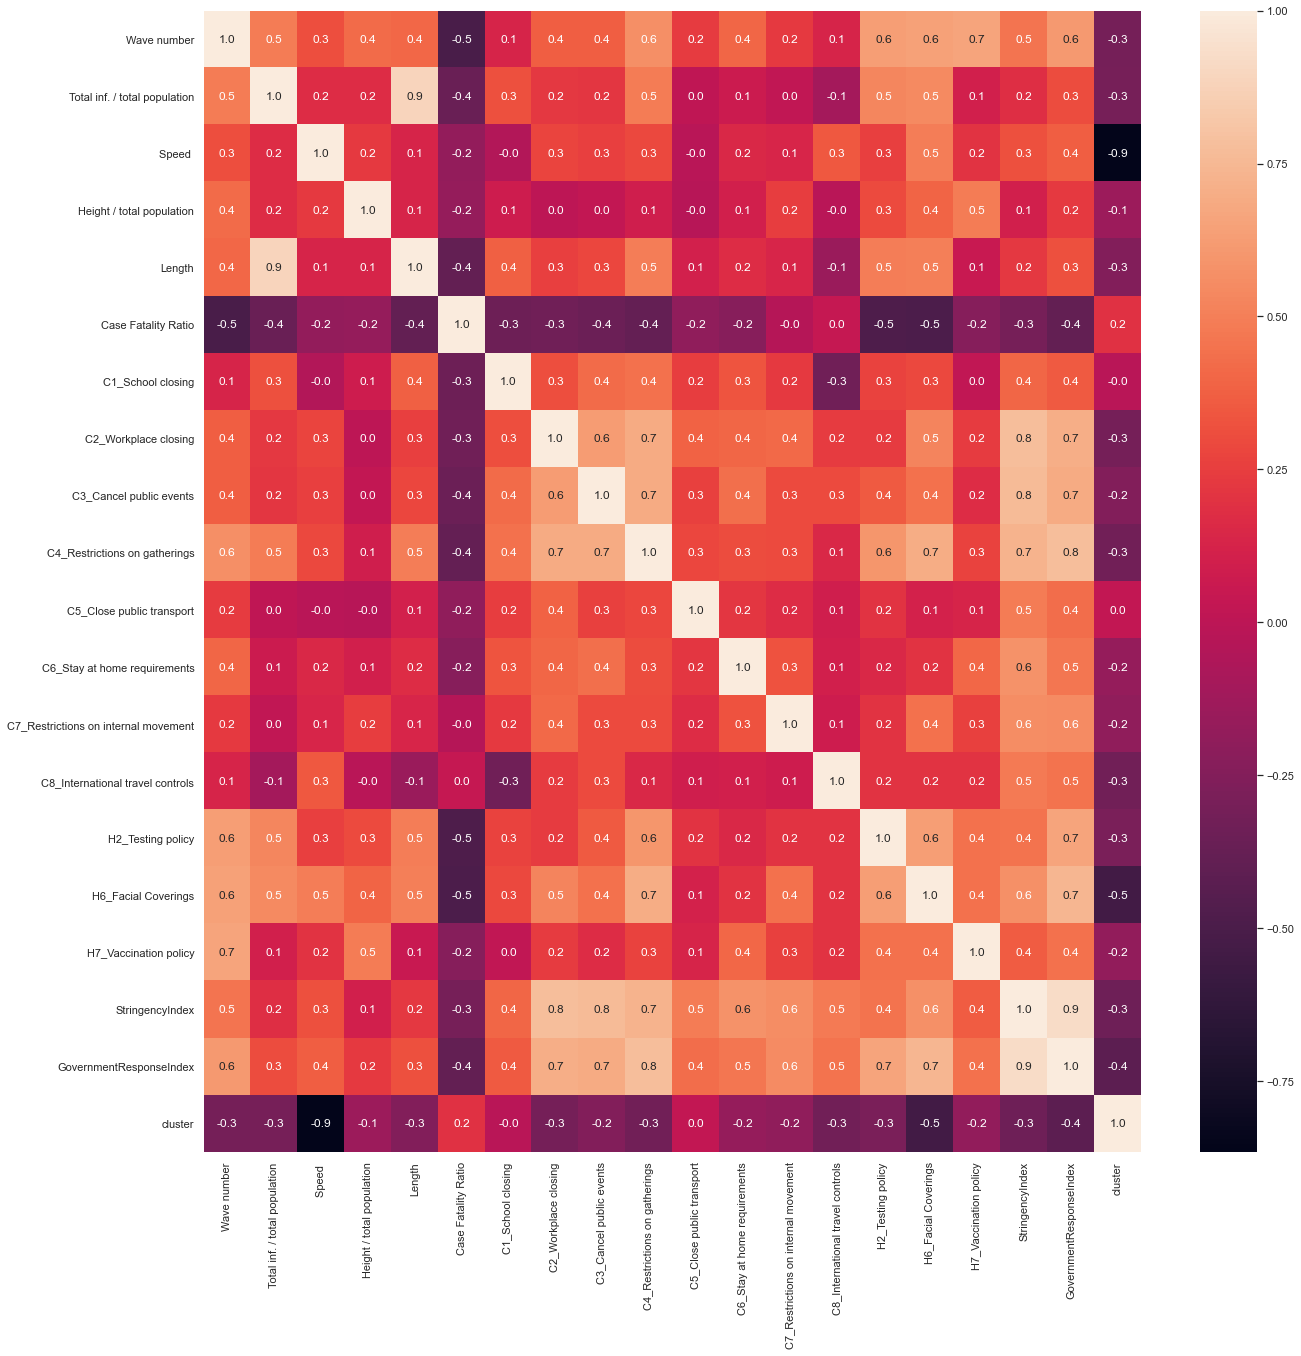

In [196]:
import seaborn as sn
f= plt.subplots(figsize=(21,21))
sn.heatmap(X_scaled_clustered.corr(),annot=True,fmt='.1f',color='green')